<h1>Импорт библиотек

In [6]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [10]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    R = 0
    for i in range(len(X)):
            R += np.dot(X[i], V[i])
    return R


assert np.array_equal(sum_prod([[[1,2],[3,4]]], [[1,2]]), [5,11])
assert np.array_equal(sum_prod([ [ [5,6],[7,8] ], [ [1,2],[3,4] ] ], [[1,1],[2,2]]), [17,29])
assert np.array_equal(sum_prod([ [ [5,6],[7,8] ], [ [1,2],[3,4] ] , [[7,5],[1,1]] ], [[1,1],[2,2],[3,3]]), [53,35])

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [9]:
def binarize(M, threshold=0.5):
    matrix = []
    for row in M:
        binary_row = [1 if val > threshold else 0 for val in row]
        matrix.append(binary_row)

    return matrix

mat = np.array([[0.1, 0.6, 0.4], [0.7, 0.3, 0.8], [0.2, 0.9, 0.5]])
assert np.array_equal(binarize(mat), np.array([[0, 1, 0], [1, 0, 1],[0, 1, 0]]))

mat = np.array([[12, 34, 58], [59, 43, 15], [98, 90, 1], [21, 80, 43]])
assert np.array_equal(binarize(mat, 50), np.array([[0, 0, 1], [1, 0, 0], [1, 1, 0], [0, 1, 0]]))

<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [8]:
def unique_rows(mat):
  return [list(set(row)) for row in mat]

def unique_columns(mat):
  return [list(set(col)) for col in zip(*mat)]

mat = np.array([[2, 2, 4], [1, 1, 4], [1, 2, 2]])
assert np.array_equal(unique_rows(mat), [[2, 4], [1, 4], [1, 2]])
assert np.array_equal(unique_columns(mat), [[1, 2], [1, 2], [2, 4]])

mat = np.array([[1, 15, 4], [12, 1, 1], [3, 3, 1], [6, 6, 15], [2, 2, 2]])
assert unique_rows(mat) == [[1, 4, 15], [1, 12], [1, 3], [6 ,15], [2]]
assert unique_columns(mat) == [[1, 2, 3, 6, 12], [1, 2, 3, 6, 15], [1, 2, 4, 15]]

<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

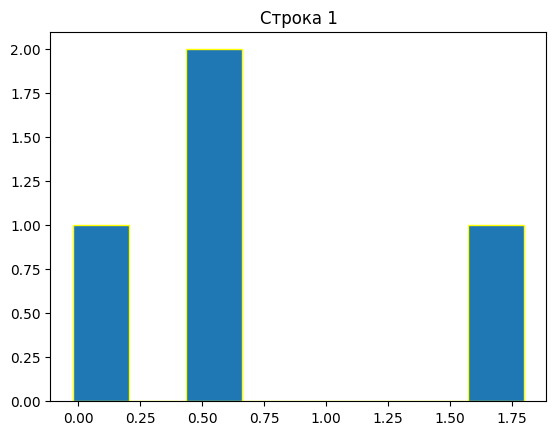

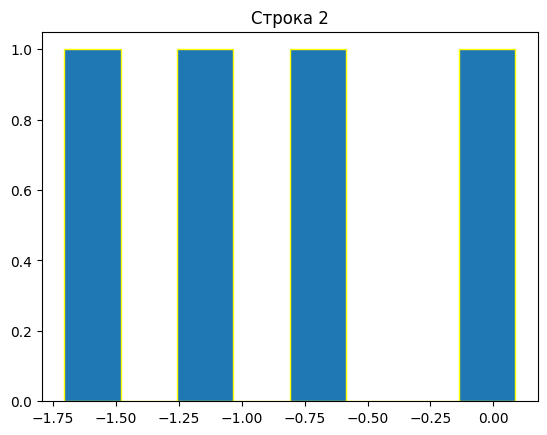

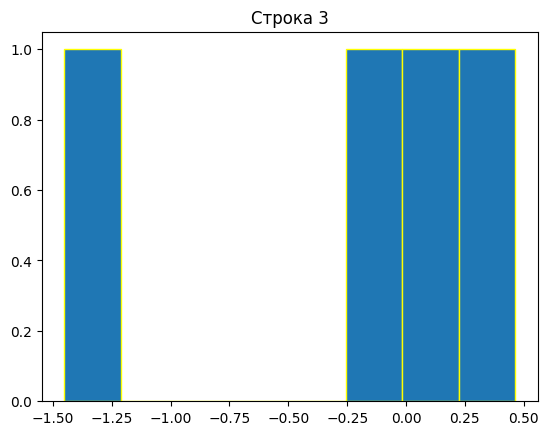

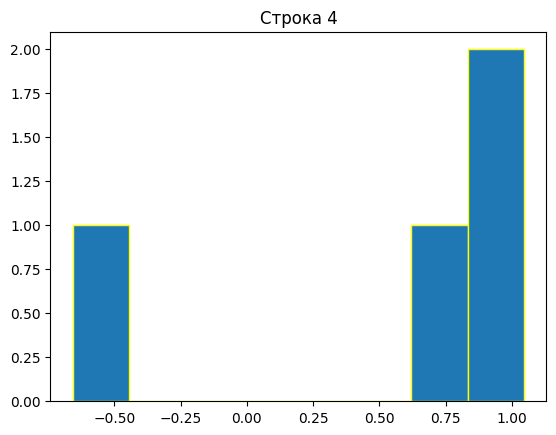

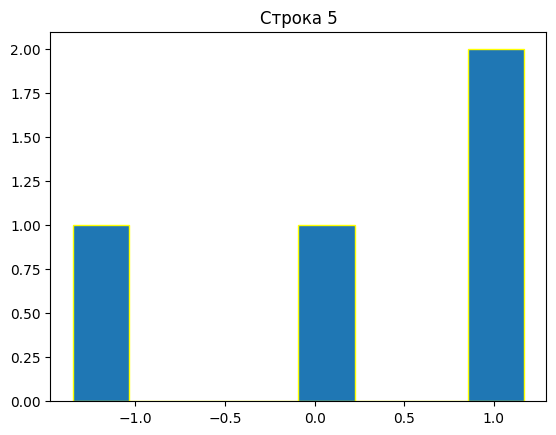

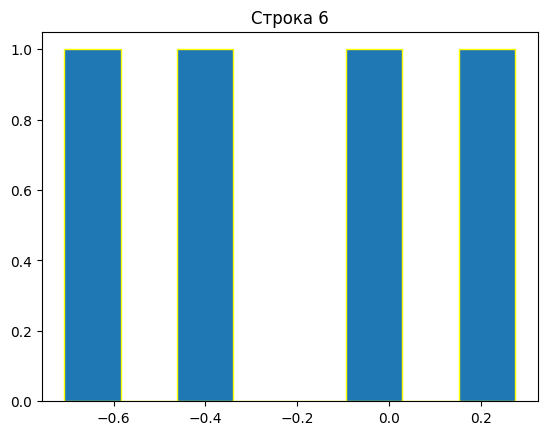

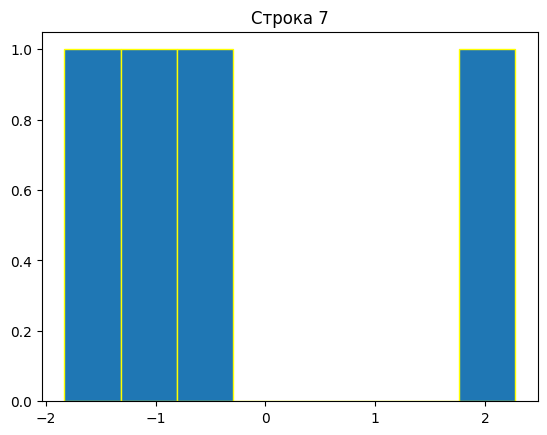

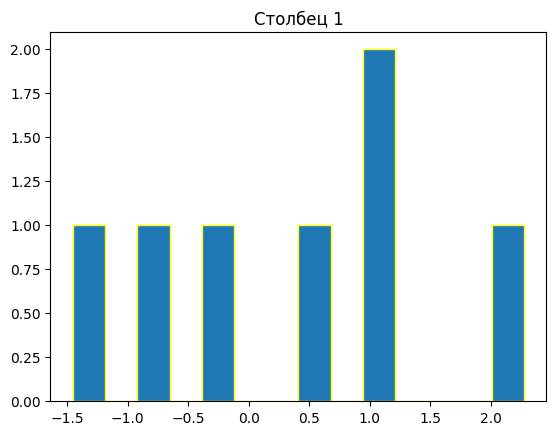

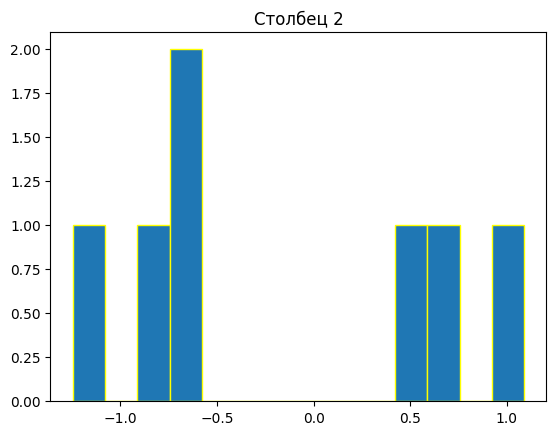

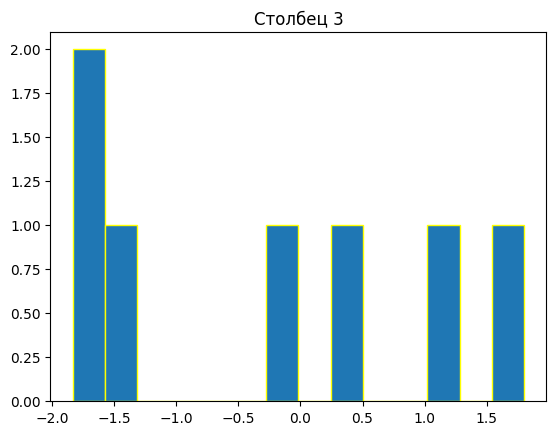

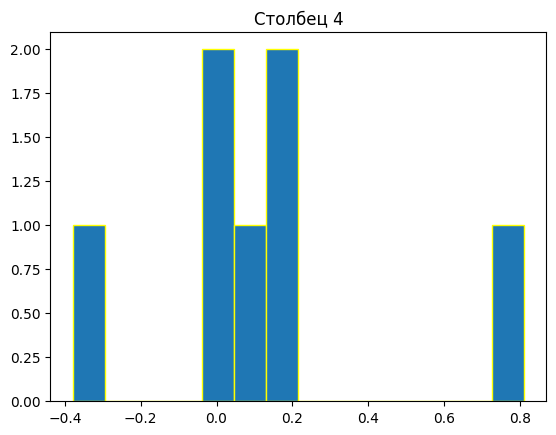

In [8]:
def fill_matrix(m,n):
    
    mat = np.random.randn(m, n)

    for i in range(m):
        plt.hist(mat[i], bins=n*2, ec="yellow")
        plt.title(f'Строка {i+1}')
        plt.show()

    for j in range(n):
        plt.hist(mat[:,j], bins=m*2, ec="yellow")
        plt.title(f'Столбец {j+1}')
        plt.show()

fill_matrix(7, 4)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
def chess(m, n, a, b):
  mat = np.empty((m, n))
    
  for i in range(m):
    for j in range(n):
      mat[i, j] = a if (i + j) % 2 == 0 else b

  return mat

assert np.array_equal(chess(4, 3, 1, 0), np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1], [0, 1, 0]]))

<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

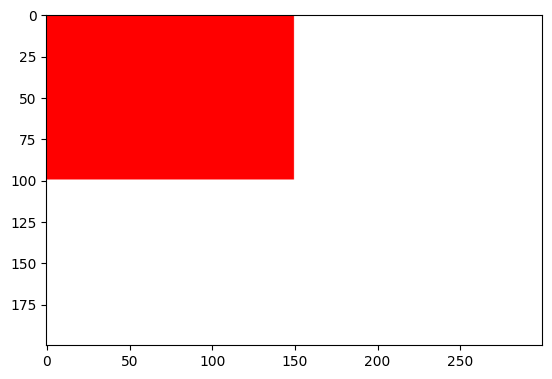

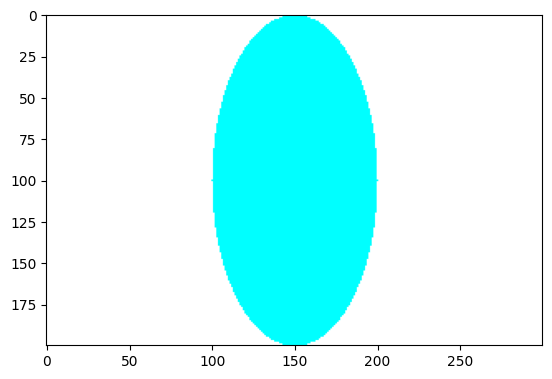

In [10]:
# Отрисовка прямоугольника
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  image = np.zeros((m, n, 3), dtype=np.uint8)

  image[:, :] = background_color

  image[:a, :b] = rectangle_color

  plt.imshow(image)
  plt.show()
    
# Отрисовка овала
def draw_ellipse(a, b, m, n, ellipse_color, background_color):
  image = np.zeros((m, n, 3), dtype=np.uint8)

  image[:, :] = background_color

  for i in range(m):
    for j in range(n):
      if ((i-m/2)**2)/(a**2) + ((j - n/2)**2)/(b**2) <= 1:
        image[i, j] = ellipse_color

  plt.imshow(image)
  plt.show()


draw_rectangle(100, 150, 200, 300, (255, 0, 0), (255, 255, 255))
draw_ellipse(100, 50, 200, 300, (0,255, 255), (255, 255, 255))

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [11]:
def time_series_info(time_series):
  print(f"Мат. ожидание: {np.mean(time_series)}")
  print(f"Дисперсия: {np.var(time_series)}")
  print(f"СКО: {np.std(time_series)}")
  print(f"Локальные максимумы: {[time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]]}")
  print(f"Локальные минимумы: {[time_series[i] for i in range(1, len(time_series) - 1) if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]]}")
  print(f"Скользящее среднее: {np.convolve(time_series, np.ones(3)/3, 'valid')}")


time_series_info(np.array([7,7,7,8,2,9,8,9,2,6]))

Мат. ожидание: 6.5
Дисперсия: 5.85
СКО: 2.4186773244895647
Локальные максимумы: [8, 9, 9]
Локальные минимумы: [2, 8, 2]
Скользящее среднее: [7.         7.33333333 5.66666667 6.33333333 6.33333333 8.66666667
 6.33333333 5.66666667]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [16]:
def one_hot_encoding(vector):
    
  num_classes = np.max(vector) + 1

  encoding = np.zeros((len(vector), num_classes))
  encoding[np.arange(len(vector)), vector] = 1
  return encoding

print(one_hot_encoding(np.array([0, 2, 3, 0])))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
